# Support Vector Machines

## Face Recognition using SVMs

We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures.

In [26]:
# Let's import the required libraries
from sklearn.datasets import fetch_lfw_people
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Let's fetch some data!

In [4]:
faces = fetch_lfw_people(min_faces_per_person=100)
print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


### Lets plot a few faces to see the data that we are dealing with

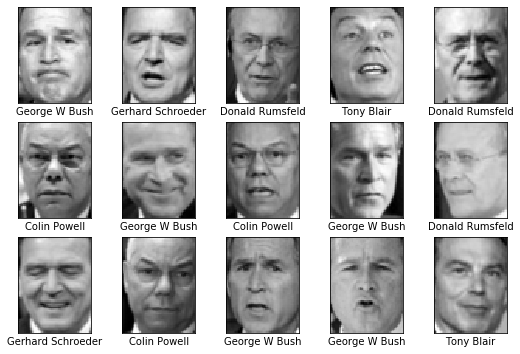

In [14]:
fig, ax = plt.subplots(3, 5)
fig = plt.gcf()
fig.set_size_inches(9,6)

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

### Step 2: Split the data into training and testing sets

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target,
                                                random_state=42)

### Step 3: Train the SVM model

In [18]:
from sklearn.svm import SVC

model = SVC(class_weight='balanced')
model.fit(Xtrain, ytrain)

SVC(class_weight='balanced')

### Step 4: Testing and Evaluating the predictions of the model

In [19]:
yfit = model.predict(Xtest)

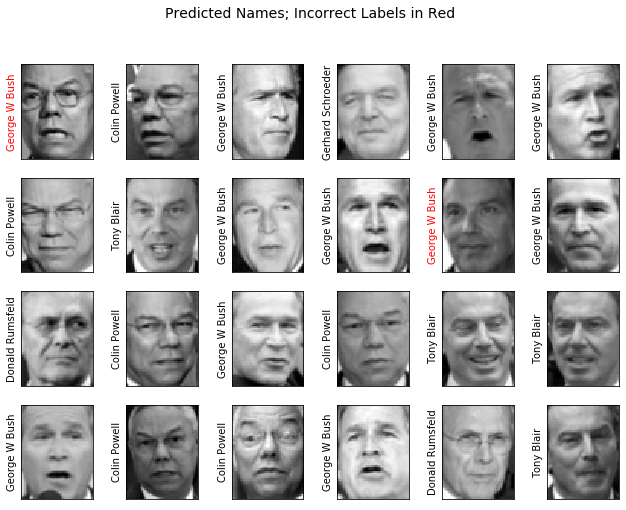

In [23]:
fig, ax = plt.subplots(4, 6)
fig = plt.gcf()
fig.set_size_inches(11,8)

for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]],
                   color='black' if yfit[i] == ytest[i] else 'red')
    
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [24]:
# Evaluating the model - Classification Report
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.82      0.86      0.84        64
  Donald Rumsfeld       0.84      0.81      0.83        32
    George W Bush       0.86      0.89      0.88       127
Gerhard Schroeder       0.79      0.66      0.72        29
       Tony Blair       0.84      0.82      0.83        33

         accuracy                           0.84       285
        macro avg       0.83      0.81      0.82       285
     weighted avg       0.84      0.84      0.84       285



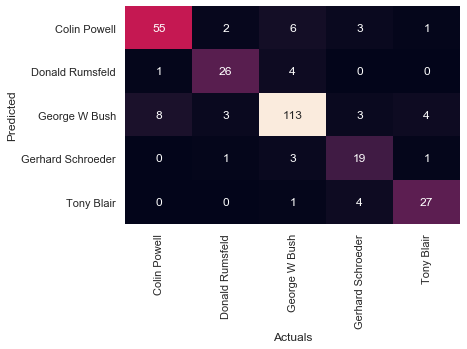

In [30]:
# Let's plot the confusion matrix
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(ytest, yfit)

# Plotting the heatmap
sns.heatmap(conf_mat.T, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('Actuals')
plt.ylabel('Predicted');

This helps us get a sense of which labels are likely to be confused by the estimator.